<a href="https://colab.research.google.com/github/Rajshekhar-Reddy1/-Insaid-AI-Regards/blob/main/casestudysalesforecasting_221027_181816.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

<h1><center><strong>Sales Forecasting</strong></center></h1>

# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Importing Libraries](#Section3)<br>
  - 3.1 [Installing Libraries](#Section301)<br>
  - 3.2 [Importing Libraries](#Section302)<br>
4. [Data Loading and Dataset Description](#Section4)<br>
  - 4.1 [Data Loading](#Section401)<br>
  - 4.2 [Pre-Pandas Profiling](#Section404)<br>
5. [Data Pre-Processing](#Section5)<br>
  - 5.1 [Dealing with Missing Values](#Section501)<br>
  - 5.2 [Feature (Month) Extraction from Date](#Section502)<br>
6. [Exploratory Data Analysis](#Section6)<br>
7. [Post Data Processing & Analysis](#Section7)<br>
  - 7.1 [Encoding Categorical Data](#Section701)<br>
  - 7.2 [Feature (Day) Extraction from Date](#Section702)<br>
  - 7.3 [Data Splitting](#Section704)<br>
8. [Model Development & Evaluation](#Section8)<br>
    - 8.1 [Baseline Models](#Section801)<br>
    - 8.2 [Essential Feature Models](#Section802)<br>
    - 8.3 [Hyperparameter Tuning of Model](#Section803)<br>
    - 8.4 [Final Model](#Section804)<br>
9. [Conclusion](#Section9)<br>

<a id = Section1></a>
## **1. Introduction**

- Forecasting means the **estimation** of quantity, type, and quality of future work e.g. sales.

- Any forecast can be termed as an **indicator** of what is likely to happen in a specified **future** time frame in a particular field.

- Therefore, the sales forecast indicates as to how much of a particular **product** is likely to be **sold** in a specified future period in a specified market at speci­fied price.

- For any manufacturing concern, it is very necessary to assess the **market trends** sufficiently in ad­vance.

- This forecast helps the management in determining as to how much **revenue** can be expected to be realized, how much to manufacture, and what shall be the **requirement** of men, machines, and money.


<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/sales_forecasting.jpg" width="500px"></center>

<a id = Section2></a>
## **2. Problem Statement**

- The **demand** for a product or service keeps **changing** from time to time.

- No business can improve its financial performance without **estimating customer demand** and future sales of products/services accurately.


<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/sales_forecasting1.jpg" width="700px""></center>

**<h4>Business Scenario:</h4>**

- A multinational retail corporation named **Shopper's Depot** operates a chain of hypermarkets, discount department stores, and grocery stores all around the world.

- The company is planning to open some additional stores in different regions and the management wants to **predict** the **future sales** of these stores and the **factors affecting** the sales numbers.

- This will help them in allocating a **budget** to each store according to the amount of mechanical and human resources required in the stores and setting up the **supply chain** and **inventory** systems.

- One challenge of modeling retail data is the need to make decisions based on **limited history**.

- As a result, the company has assigned its Data Science division the task to make the **department-wide sales forecast** for each store.

- The **target feature** is the **Weekly_Sales** column which shows the **sales** for the given department in the given store for a particular week.

<a id = Section3></a>
## **3. Importing Libraries**

<a id = Section301></a>
### **3.1 Installing Libraries**

**Note:** After installing, you need to restart the runtime. Make sure not to execute the cell again after restarting the runtime.

In [ ]:
!pip install -q pandas-profiling --upgrade

<a id = Section302></a>
### **3.2 Importing Libraries**

In [ ]:
# For Numerical Python
import numpy as np

# For Panel Data Analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.precision', 4)

from pandas_profiling import ProfileReport

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# For Data Model Development
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
# For Machine Learning Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<a id = Section4></a>
## **4. Data Loading and Dataset Description**

- We are provided with historical sales data for **45 The Shopper's Depot** stores located in different regions from **2010-02-05 to 2012-11-01**.

- Each store contains about **99** different **departments**, and we are tasked with predicting the department-wide sales for each store.

- In addition to the stores basic operations, *The Shopper's Depot* runs several **promotional markdown events** throughout the year.

  - These markdowns are known to **affect sales**, but it is challenging to predict which departments are affected and the extent of the impact.

<br> 

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 421,570 | 16 | 37 MB| 

<br> 

| Column | Description |
| :--:| :--: | 
| **Store** | The store number. |
| **Dept** | The department number. |
| **Date** | The week |
| **Weekly_Sales** | Sales for the given department in the given store. |
| **IsHoliday** | Whether the week is a special holiday week. |
| **Temperature** | Average temperature in the region. |
| **Fuel_Price** | Cost of fuel in the region. |
| **MarkDown1** | Anonymized data related to promotional markdowns that **The Shopper's Depot** is running. |
| **MarkDown2** | Anonymized data related to promotional markdown. |
| **MarkDown3** | Anonymized data related to promotional markdowns. |
| **MarkDown4** | Anonymized data related to promotional markdowns. |
| **MarkDown5** | Anonymized data related to promotional markdowns. |
| **CPI** | The consumer price index. |
| **Unemployment** | The unemployment rate. |
| **Type** | Type of the store. |
| **Size** | Size of the store. |

<a id = Section401></a>
### **4.1 Data Loading**

In [ ]:
sales_df = pd.read_csv('https://storage.googleapis.com/retail-analytics-data/weekly_sales_data.csv')
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.0964,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.0964,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.0964,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.0964,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.0964,8.106,A,151315


<a id = Section404></a>
### **4.2 Pre Profiling Report**

- Using **pandas-profiling** to quickly *analyse* our data.

In [ ]:
profile = ProfileReport(sales_df, progress_bar=False, minimal=True)

In [ ]:
profile.to_file(output_file="Pre_Profiling_Report.html")
print('Pre-Profiling Accomplished!')

Pre-Profiling Accomplished!


**Observations:**

- There are **16 variables** and **421570 observations** in the dataset.

- There are **1422431 missing** cells (**21.1%** of all cells) in the data.

- Of all the 16 variables **13** are **numerical**, **2** are **categorical** and **1** is **boolean**.

- `Date` column has a high cardinality with 143 distinct values.

- `Date` only contains **datetime** values, but is having a **categorical** dtype.

- All the MarkDown columns have more than **64% missing** values:
  
  - `MarkDown1` has **270889** (**64.3%**) missing values

  - `MarkDown2` has **310322** (**73.6%**) missing values
  
  - `MarkDown3` has **284479** (**67.5%**) missing values
  
  - `MarkDown4` has **286603** (**68.0%**) missing values
  
  - `MarkDown5` has **270138** (**64.1%**) missing values

- All the MarkDown columns have a **positive skewness** values and very **high kurtosis** value suggesting presence of **outliers**.

- `IsHoliday` contains only **two unique** values True and False.

- `Type` has **3** distinct values: **A**, **B**, and **C**.

- `Weekly_Sales` has a mean of 15981.25 and a median of 7612.03

  - The **skewness** is **3.26**, meaning the distribution if positive (right) skewed.

  - Also, it has a very high **kurtosis** value at **21.49**, suggesting presence of outliers in the distribution.

  - The maximimum value in this column is **693099.36** which is very far away from the **95-th percentile** value of **61201.95**, meaning that it's an **outlier**.

<a id = Section5></a>
## **5. Data Pre-Processing**

<a id = Section501></a>
### **5.1 Dealing with Missing Values**

- First, we will check the **number** of missing values in each column.

In [ ]:
# Checking number of missing values
sales_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

- We know that each Markdown column has more than **64% missing values** from the Profiling Report.


- But, we don't know for sure whether these **markdown events** were even *organized prior to November 2011*, so we should not just fill these values with the median value.
  
  - Instead we will **fill** the missing values with **0**, in order to maintain the integrity of the dataset.

In [ ]:
# Filling the missing values with 0
sales_df.fillna(0, inplace=True)

In [ ]:
# Rechecking for missing values
sales_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

- All the missing values in the data have been **filled**.

- There are **no missing values** in the data now.

<a id = Section502></a>
### **5.2 Feature (Month) Extraction from Date**

- We will **change** the **datatype** of the `Date` column from *Object* to *DateTime*.

In [ ]:
# Changing the Date column's dtype from Object to DateTime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

- We can now use this `Date` column to extract **day**, **month** and **year** information as features.

- But, we are **aggregating** the *sales on a weekly basis*, so there's no point in extracting the Day from the Date.

- Also, the Year will only have **3 distinct** values 2010, 2011 and 2012.

  - Sales can only be affected by Year due to some **rare phenomenon** like Stock Market Crashes, Disease Outbreaks, or Natual Disasters.

  - Since, these can't be predicted in advance we can say that the **Year won't affect** the **weekly sales** of the stores.

- As a result, we will only extract the **Month** information from the `Date` column.

In [ ]:
# Creating Month column in the sales_df after extracting the information from Date column
sales_df['Month'] = sales_df['Date'].dt.month

In [ ]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,A,151315,2
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,A,151315,2
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,A,151315,2
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,A,151315,2
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,A,151315,2


- `Month` column is added to the sales_df containing the **month** from the weekly sales date.

- We can still see that we have two columns having **categorical / textual** data: `IsHoliday`, and `Type`.

- We will **encode** these columns *after performing* the **analysis** on the data, so that they can be used in the model for prediction.

<a id = Section6></a>
## **6. Exploratory Data Analysis**

### **Question 1: How are the stores distributed based on their Type?** 

In [ ]:
# Checking the count of each type of store
sales_df.groupby(['Type'])['Store'].nunique()

Type
A    22
B    17
C     6
Name: Store, dtype: int64

Text(0.5, 1.0, 'Proportional Distribution of Type')

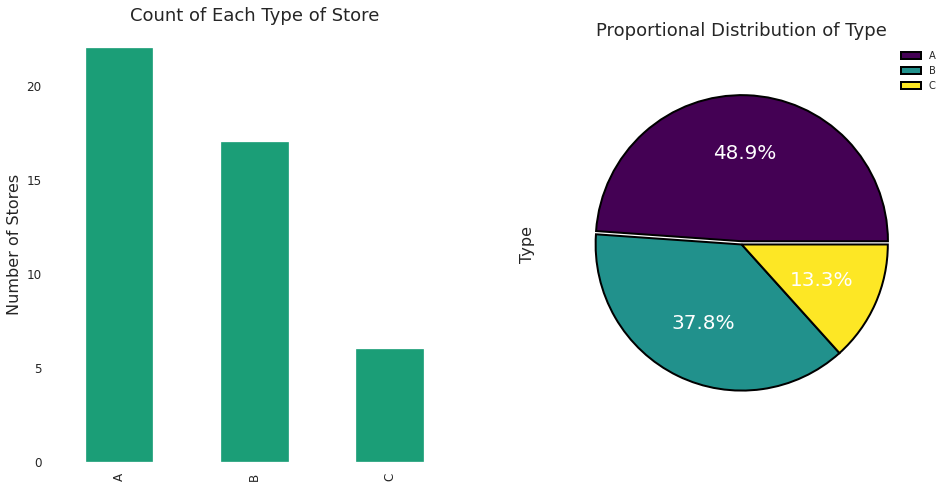

In [ ]:
# Plotting the Count and Proportional Distribution of Stores based on Type
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

# Plotting the count of each type of store
sales_df.groupby(['Type'])['Store'].nunique().plot(kind='bar', colormap='Dark2', fontsize=12)
plt.xlabel('')
plt.ylabel('Number of Stores', fontsize=16)
plt.title('Count of Each Type of Store', fontsize=18)

plt.subplot(1, 2, 2)

# Plotting the proportional distribution stores
sales_df.groupby(['Type'])['Store'].nunique().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.6, explode=(0.02, 0, 0), radius=0.9, 
                                                   colormap='viridis', legend=True, wedgeprops={'edgecolor':'black', 'linewidth':2}, 
                                                   textprops={'fontsize':20, 'color':'white'})
plt.ylabel('Type', fontsize=16)
plt.title('Proportional Distribution of Type', fontsize=18)

**Observations:**

- Stores belonging to **Type A** have the highest number of counts with **22**, accounting for **48.9%** of all stores in the data.

- **Type B** stores have **17** counts followed by **Type C** stores with **6** counts.

  - **37.8%** stores belong to type **B** and the remaining **13.3%** stores belong to the type **C**.

- We now know the proportional distribution of stores based on their type, but can we find some other relationship between the other features.

### **Question 2: Is the Size of the Store related to the Type of the Store?**

Text(0.5, 1.0, 'Relationship Between the Size and Type of the Store')

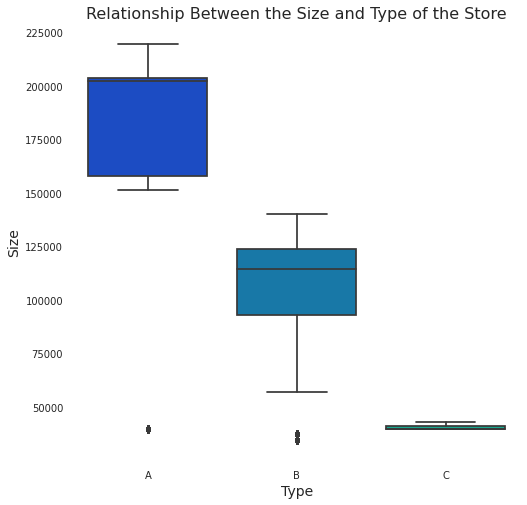

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=sales_df, x='Type', y='Size', palette='winter', width=0.8)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.title('Relationship Between the Size and Type of the Store', fontsize=16)

**Observations:**

- **Type A** stores have the **largest** size, followed by Type B stores.

- **Type C** stores have the **smallest** size.

- There is **no overlapped area** in *size among A, B, and C* which means that *Type* is the **best predictor** for the *Size* of the store.

- We infer that Type might just be a **proxy** or **alias** for the Size of the store. 
- **Larger stores** might have **higher weekly sales**.

- Can we see a relationship between the `Type` and `Weekly_Sales` of a store.

### **Question 3: Does the Larger Sized Stores have Higher Weekly Sales?**

Text(0.5, 1.0, 'Relationship Between the Weekly Sales and Type of the Store')

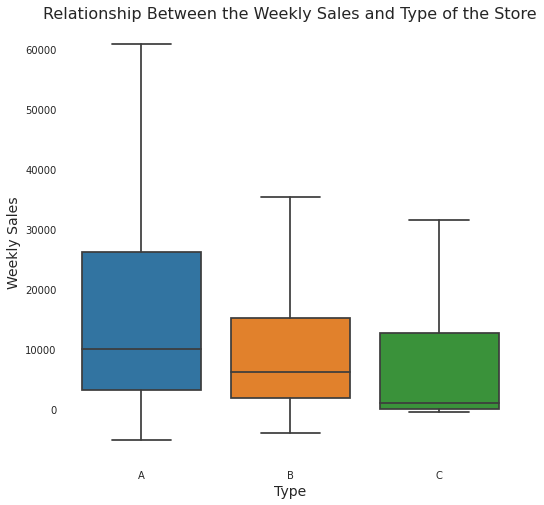

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=sales_df, x='Type', y='Weekly_Sales', width=0.8, showfliers=False)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Relationship Between the Weekly Sales and Type of the Store', fontsize=16)

**Observations:**

- The **median** of **A** is the **highest** and **C** is the **lowest**.

- Also, the order of median of size and median of sales is the same.

- That means the stores with **larger sizes** have **higher sales** record.

### **Question 4: Is there a Strong Positive Correlation between the Size and the Weekly Sales of a Store?**

Text(0.5, 1.0, 'Relationship Between the Weekly Sales and Size of the Store')

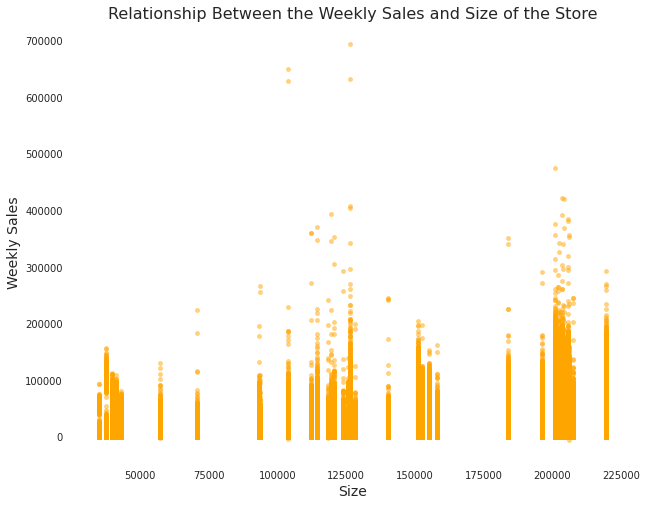

In [ ]:
sales_df.plot(kind='scatter', x='Size', y='Weekly_Sales', alpha=0.5, figsize=(10, 8), color='Orange')
plt.xlabel('Size', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Relationship Between the Weekly Sales and Size of the Store', fontsize=16)

**Observations:**

- Based on this plot, the results don't look so good.

- We **can't infer** any **distinct relationship** between *size* and *sales*.

- It seems a bit **linear**.

### **Question 5: How does each Store perform on the basis of Weekly Sales?**

Text(0.5, 1.0, 'Weekly Sales of Each Store with respect to the Type of the Store')

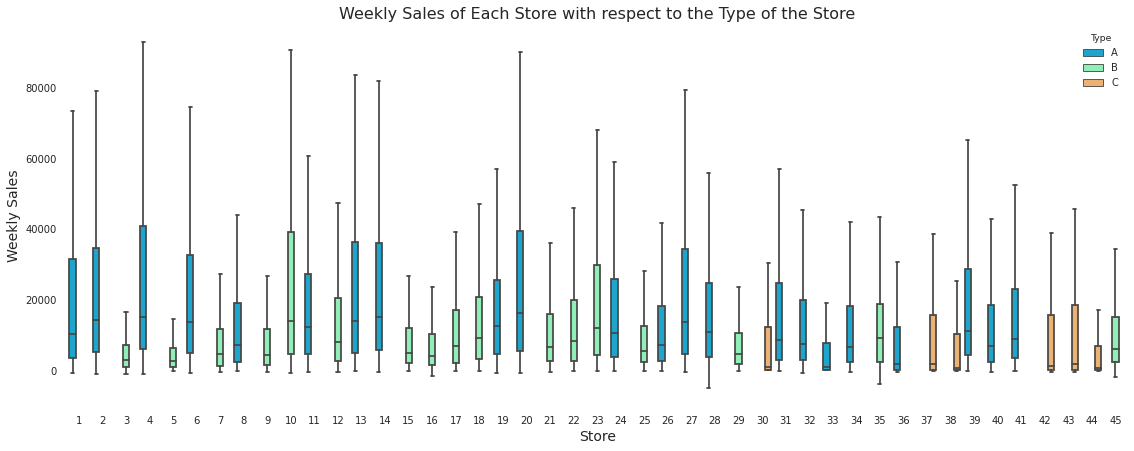

In [ ]:
plt.figure(figsize=(19, 7))
sns.boxplot(data=sales_df, x='Store', y='Weekly_Sales', hue='Type', showfliers=False, palette='rainbow')
plt.xlabel('Store', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Weekly Sales of Each Store with respect to the Type of the Store', fontsize=16)

**Observations:**

- Each store has a **distinct distribution** of weekly sales throughout the dataset.

- Most of the **Type A** stores have **higher weekly sales record** than other type stores.

- `Store` can be the variable giving **important information** on weekly sales.

- But it is including so much **intrinsic information** of *Type*, *Size*, and *Department*.

- We need to segment this information into distinct plots.

**Observation:**

- There **isn't a significant relationship** between the weekly sales of the stores for holidays and non-holidays.

- But, we do see **higher weekly sales** soaring during the **holiday weeks**.

### **Question 6: Does the Weekly Sales for each Department vary with the Size of the Store?**


Text(0.5, 1.0, 'Weekly Sales of Each Department with respect to the Type of the Store')

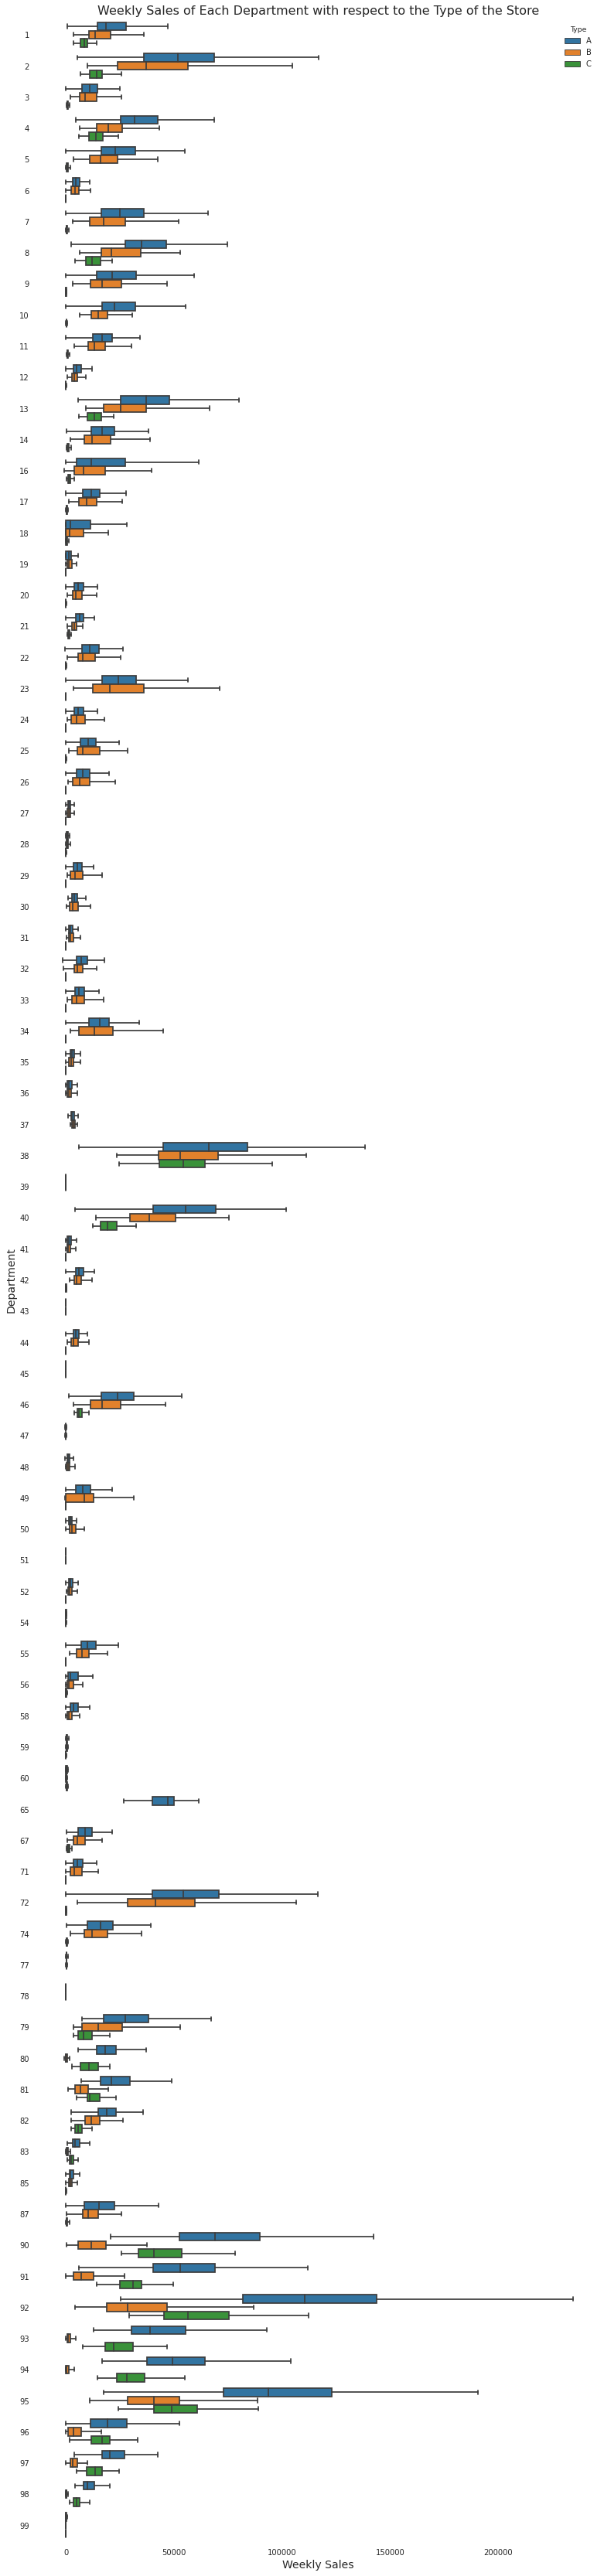

In [ ]:
plt.figure(figsize=(13, 60))
sns.boxplot(data=sales_df, x='Weekly_Sales', y='Dept', hue='Type', orient='h', showfliers=False)
plt.xlabel('Weekly Sales', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.title('Weekly Sales of Each Department with respect to the Type of the Store', fontsize=16)

**Observations:**

- We can clearly observe that the Departments belonging to **Type A** stores have the **highest sales record**.

- This can imply that *departments at* the **larger stores** have **higher weekly sales record** than those at the *smaller stores*.

### **Question 7: Do the Holidays impact the Weekly Sales of the Stores?**

Text(0.5, 1.0, 'Weekly Sales of Each Store for Holiday and Non-Holiday Weeks')

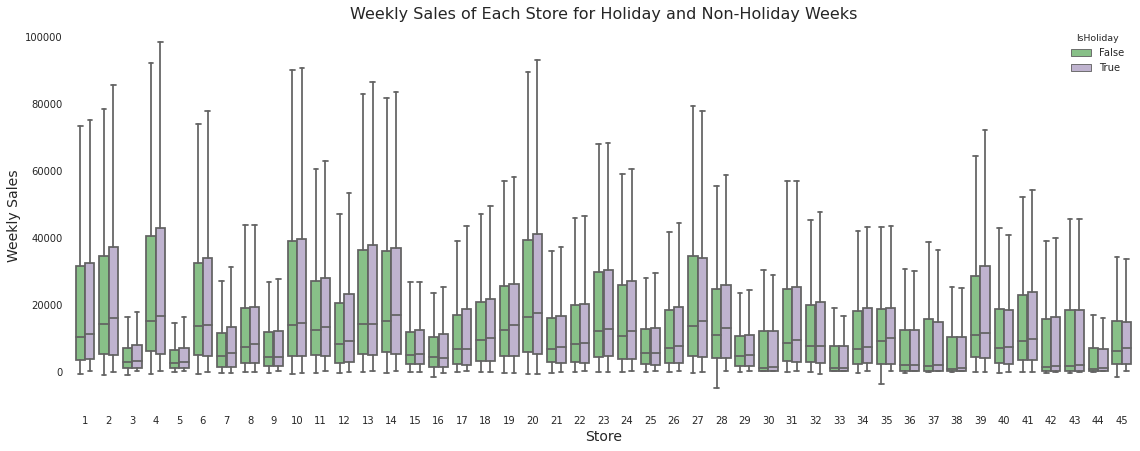

In [ ]:
plt.figure(figsize=(19, 7))
sns.boxplot(data=sales_df, x='Store', y='Weekly_Sales', hue='IsHoliday', showfliers=False, palette='Accent')
plt.xlabel('Store', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Weekly Sales of Each Store for Holiday and Non-Holiday Weeks', fontsize=16)

### **Question 8: How does the Weekly Sales vary for each Month?**


Text(0.5, 1.0, 'Weekly Sales during Each Month')

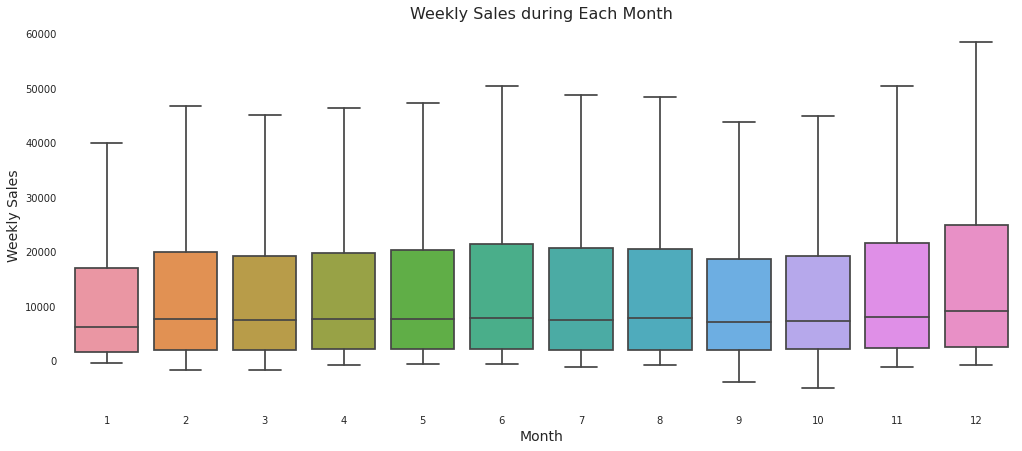

In [ ]:
plt.figure(figsize=(17, 7))
sns.boxplot(data=sales_df, x='Month', y='Weekly_Sales', showfliers=False)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Weekly Sales during Each Month', fontsize=16)

**Observations:**

- Month **12** i. e. **December** has the **highest sales record** than any other month.

  - This might be due to the fact that most people do their **Christmas shopping** during this time.

- Also, Month **1** i. e. **January** has the lowest median weekly sales compared to other months.

  - This might be because of the **New Year Resolutions** made by people, which prevent them from buying certain things in January.

### **Question 9: Does the Store Size have an effect on the Weekly Sales of each Month?**

Text(0.5, 1.0, 'Weekly Sales during Each Month with respect to the Type of the Store')

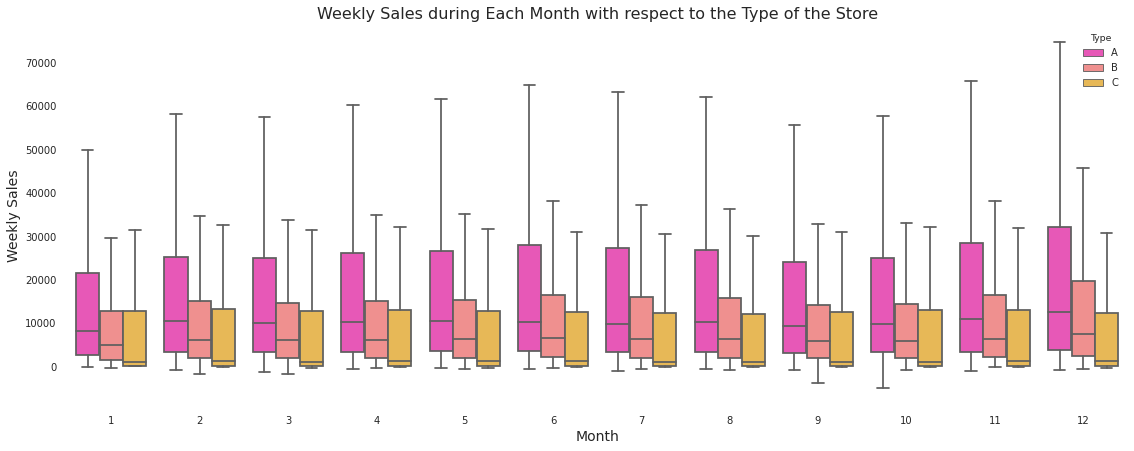

In [ ]:
plt.figure(figsize=(19, 7))
sns.boxplot(data=sales_df, x='Month', y='Weekly_Sales', hue='Type', showfliers=False, palette='spring')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Weekly Sales during Each Month with respect to the Type of the Store', fontsize=16)

**Observations:**

- Again, we can see that the **Type A** stores have the **highest weekly sales record** for **each month**.

- This means that the **larger stores** have **higher sales record** each month than the smaller stores.

<a id = Section7></a>
## **7. Post Data Processing & Analysis**

<a id = Section701></a>
### **7.1 Encoding Categorical Data**

- The `Type` column in the dataset contains **categorical** data.

- It has **3** distinct values: **A**, **B**, and **C**.

- We will use **dummy encoding** to achieve this.

In [ ]:
# Creating dummy variable of the Type column
sales_df = pd.get_dummies(sales_df, columns=['Type'])
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0


<a id = Section702></a>
### **7.2 Feature (Day) Extraction from Date**

- During Data Preprocessing we **didn't extracted** the **day** information from the `Date` because it wouldn't have helped us during the analysis.

- But, the ML *models can't process* **DateTime** format features and hence we need to **remove** the *Date column* from the dataset *before training* our models.

- So, in order to conserve the weekly date information, we will create a **Day** column by **extracting** the *day information* from the date.

In [ ]:
# Creating Day column in the sales_df after extracting the information from Date column
sales_df['Day'] = sales_df['Date'].dt.day
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month,Type_A,Type_B,Type_C,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5


- `Day` column is created in the dataframe containing the **day** value from the `Date` column. 

In [ ]:
# Removing Date column from sales_df
sales_df.drop(['Date'], axis=1, inplace=True)

In [ ]:
sales_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month,Type_A,Type_B,Type_C,Day
0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
1,1,2,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
2,1,3,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
3,1,4,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
4,1,5,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5


- `Date` is removed from the **sales_df**.

<a id = Section704></a>
### **7.3 Data Splitting**

- Now, we will **split** the dataset into **Train** and **Test** subsets.

- We will use **80%** data for **training** and the remaining **20%** data for **testing** our models.

- First, we will **separate** the **dependent** and **independent** variable from the data *by creating* a **feature matrix** and a **target vector**.

In [ ]:
# Creating the feature matrix by removing the target variable
X = sales_df.drop(['Weekly_Sales'], axis=1)
X.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month,Type_A,Type_B,Type_C,Day
0,1,1,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
1,1,2,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
2,1,3,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
3,1,4,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5
4,1,5,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.0964,8.106,151315,2,1,0,0,5


In [ ]:
# Creating the target vector
y = sales_df['Weekly_Sales']
y.head()

0    24924.50
1    50605.27
2    13740.12
3    39954.04
4    32229.38
Name: Weekly_Sales, dtype: float64

In [ ]:
# Using scikit-learn's train_test_split function to split the dataset into train and test sets.
# 80% of the data will be in the train set and 20% in the test set, as specified by test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Checking the shapes of the training and test sets.
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (337256, 18) (337256,)
Testing Data Shape: (84314, 18) (84314,)


<a id = Section8></a>
## **8. Model Development & Evaluation**

- In this section, we will be **building** our Machine Learning models and fitting them with the training data.

- We will be building models using:

  - **All** the **features** of the training set.

  - The most **important features** of the training set, according to the Random Forest algorithm.

- We will use **K-fold Cross Validation** to validate our models and select the best one.

- We are creating a **helper function** `display_scores` that will help us in **displaying** our *K-fold cross validation* **scores**.

In [ ]:
# A helper function to display the scores along with the mean and standard deviation of scores.
def display_scores(scores):
    scores_rmse = np.sqrt(-scores)
    print('Scores:', scores_rmse)
    print('Mean:', scores_rmse.mean())
    print('Standard Deviation:', scores_rmse.std())

<a id = Section801></a>
### **8.1 Baseline Models**

- In the baseline models, we will be using **all** the **features** of the dataset in our models.

- We will be performing **5-fold** cross-validation to **validate** our models.

<a id = Section80101></a>
#### **8.1.1 Linear Regression Model**

In [ ]:
base_lr = LinearRegression()

In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=base_lr, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

Scores: [21979.65938525 21608.2746695  21404.32551374 21509.42372403
 21560.27891321]
Mean: 21612.392441145716
Standard Deviation: 195.71008510269482


**Observations:**

- After perfoming **5-fold** cross-validation on our Baseline Linear Regression model, we get a mean **RMSE** score of **21612.39**


- This is not a good score at all, and we can't use this model in production.

- The **standard deviation** of **195** means that our model is performing almost similarly on each fold it was tested on, and is **generalizing** well on unseen data.

<a id = Section80102></a>
#### **8.1.2 Decision Tree Model**

In [ ]:
base_dt = DecisionTreeRegressor(random_state=0)

In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=base_dt, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

Scores: [5720.92847526 5119.94975833 5488.43259412 4896.45625268 5387.64846724]
Mean: 5322.683109524694
Standard Deviation: 287.42404417975183


**Observations:**

- We get a mean **RMSE** score of **5322.68** for our Baseline Decision Tree model.

- This is **4 times lower** than the Linear Regression model.

- The Decision Tree model is performing much **better** than the Linear Regression model.

- Standard Deviation at **287** is slightly **higher** than the Linear Regression model, meaning that the model is **slightly overfitting** on some folds but it won't affect the performance of the model that much.

<a id = Section80103></a>
#### **8.1.3 Random Forest Model**

In [ ]:
# Creating a Random Forest model.
base_rf = RandomForestRegressor(n_estimators=10, random_state=0, n_jobs=-1)

In [ ]:
%%time
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=base_rf, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

CPU times: user 5.51 s, sys: 1.25 s, total: 6.76 s
Wall time: 1min 53s


In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

Scores: [4319.99875092 4066.30575485 4051.58900922 3742.37212307 3806.37702732]
Mean: 3997.3285330754197
Standard Deviation: 206.5349241335799


**Observations:**

- The mean **RMSE** score for the Baseline Random Forest Model is **3997.32**

- This is significantly **lower** than the Decision Tree model.

- It took **1 minute and 53 seconds** to perform 5-fold cross-validation on our Random Forest model having 10 trees.

- Random Forest is the best performing baseline model with the lowest RMSE score.

- Also, the standard deviation at **206** is **lower** than the Decision Tree model and almost equal to the Linear Regression model, meaning it is **generalizing** well on unseen data.

#### **Checking Feature Importances**

- Now, we will check the **feature importance** of each feature using the **Random Forest** model.

In [ ]:
# Fitting the baseline Random Forest model on the entire train set to obtain the feature importances of each feature. 
base_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Checking the feature importances of various features.
# Sorting the importances by descending order (lowest importance at the bottom).
for score, name in sorted(zip(base_rf.feature_importances_, X_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of Dept : 63.35810299763713 %
Feature importance of Size : 18.569980351886365 %
Feature importance of Store : 5.573725706913679 %
Feature importance of CPI : 2.618559255198255 %
Feature importance of Month : 2.559015020219087 %
Feature importance of Day : 1.5469516159062249 %
Feature importance of MarkDown3 : 1.1309550707319727 %
Feature importance of Temperature : 1.0773925158979962 %
Feature importance of Unemployment : 1.06655871240621 %
Feature importance of Type_B : 1.0414267506149872 %
Feature importance of Fuel_Price : 0.4511742700747896 %
Feature importance of Type_A : 0.3384028827577717 %
Feature importance of IsHoliday : 0.1998231830044261 %
Feature importance of MarkDown4 : 0.12507571080904759 %
Feature importance of MarkDown2 : 0.10784629584368607 %
Feature importance of MarkDown5 : 0.10035897765823766 %
Feature importance of MarkDown1 : 0.09489185759088627 %
Feature importance of Type_C : 0.03975882484923432 %


- The feature importances are organized in a **descending** order, meaning the **most important** features are at the **top** and least important at the bottom.

- Let's **plot** the feature importances on a bar chart for a better visual look.

Text(0.5, 1.0, 'Feature Importance of each Feature')

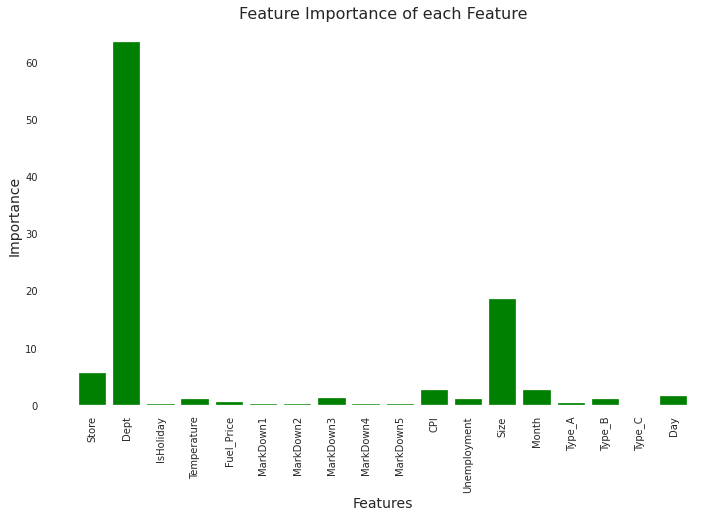

In [ ]:
# Plotting the Feature Importance of each feature.
plt.figure(figsize=(12, 7))
plt.bar(X_train.columns, base_rf.feature_importances_*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each Feature', fontsize=16)

- The *feature importance* of columns tells us which **features** are **most important** to the model while making predictions.


- Here we can see that the `Dept`column has the highest feature importance with **63.35 %**, followed by `Size` column having **18.56 %** importance.

- **Top 6** most **important** features are: `Dept`, `Size`, `Store`, `CPI`, `Month`, and `Day`.

- We will use only these features in our Essential Feature Models.

<a id = Section802></a>
### **8.2 Essential Feature Models**

- In the essential feature models, we will be using only the **most important features** of the dataset in our models.

- The features are selected on the basis of the **feature importance** obtained from the Random Forest model.

- We will be performing **5-fold** cross-validation to **validate** our models.

In [ ]:
X_train_essential = X_train[['Dept', 'Size', 'Store', 'CPI', 'Month', 'Day']]
X_train_essential.head()

,Dept,Size,Store,CPI,Month,Day
138466,96,123737,15,131.7350,3,5
289214,10,42988,30,212.9033,2,18
52351,10,202505,6,213.3400,1,21
203504,27,140167,21,217.1650,10,21
233606,25,203819,24,136.4788,11,25


<a id = Section80201></a>
#### **8.2.1 Linear Regression Model**

In [ ]:
essential_lr = LinearRegression()

In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=essential_lr, X=X_train_essential, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

Scores: [22040.66751093 21675.93363968 21460.984622   21564.3695183
 21607.5399267 ]
Mean: 21669.8990435237
Standard Deviation: 198.07879666498823


**Observations:**

- After perfoming **5-fold** cross-validation on our Essential Feature Linear Regression model, we get a mean **RMSE** score of **21669.89**

- The RMSE value has increased a little because we are only using 6 features, but the change is very small.

- Still the **error** is very **large**, and hence this model can't be used to make predictions on the test set.


<a id = Section80202></a>
#### **8.2.2 Decision Tree Model**

In [ ]:
essential_dt = DecisionTreeRegressor(random_state=0)

In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=essential_dt, X=X_train_essential, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

Scores: [4610.05869919 4651.93730874 4900.27942032 4498.63060733 4564.03025722]
Mean: 4644.9872585609555
Standard Deviation: 137.4166661941294


**Observations:**

- We get a mean **RMSE** score of **4644.98** for our Essential Feature Decision Tree model.

- The RMSE has **decreased** by a lot even though we are only using 6 features.

- The standard deviation at **137** has also decreased meaning the model is **generalizing** well on unseen data.


<a id = Section80203></a>
#### **8.2.3 Random Forest Model**

In [ ]:
# Creating a Random Forest model.
essential_rf = RandomForestRegressor(n_estimators=10, random_state=0, n_jobs=-1)

In [ ]:
%%time
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=essential_rf, X=X_train_essential, y=y_train, cv=5, scoring='neg_mean_squared_error')

CPU times: user 5.13 s, sys: 1.05 s, total: 6.18 s
Wall time: 52.6 s


In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

Scores: [3863.71427227 3765.26075202 3876.94027072 3458.74011555 3466.58863237]
Mean: 3686.2488085858436
Standard Deviation: 186.60702567666544


**Observations:**

- The mean **RMSE** score for the Essential Feature Random Forest Model is **3686.24**

- Our model has improved even though we are using only a **subset** (i. e. 6 features) of the features from the entire dataset.

- It took **53 seconds** to perform 5-fold cross-validation on our Random Forest model having 10 trees.

- The **training time** has **reduced** significantly and the **performance** has **improved**.

- The RMSE is still significantly **lower** than the Decision Tree model.

#### **Model Comparision**

**Baseline Models**

| Model | RMSE Score |
| :--: | :--: |
| **Linear Regression** | **21612.39** |
| **Decision Tree** | **5322.68** |
| **Random Forest** | **3997.32** |

<br>

**Essential Feature Models**

| Model | RMSE Score |
| :--: | :--: |
| **Linear Regression** | **21669.89** |
| **Decision Tree** | **4644.98** |
| **Random Forest** | **3686.24** |

**Observations:**

- Essential Feature Random Forest is the **best performing model** with the **lowest RMSE** score.

- It **outperforms** all the baseline and essential feature models.

<a id = Section803></a>
### **8.3 Hyperparameter Tuning of Model**

**Creating the Parameter Grid**

- The parameter grid will contain all the **values** for each hyperparameter to be used while **searching** for the best hyperparameter combinations.

In [ ]:
param_grid = [{'n_estimators': [10, 20, 30], 'max_depth': [None, 2, 3, 5], 'max_features': ['auto', 2, 4]}]

In [ ]:
temp_rf = RandomForestRegressor(random_state=0, n_jobs=-1)

**Creating Grid Search**

- We will input the **model**, **parameter grid**, **scoring method** and **number of folds** to use for cross-validation into the grid search object.

- We are using **5-fold** cross-validation here.

In [ ]:
grid_search = GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

**Performing Grid Search**

- Here, we will supply the **dataset** to be used in grid search and **initialize** our search.

In [ ]:
%%time
grid_search.fit(X_train_essential, y_train)

CPU times: user 1min 6s, sys: 3.11 s, total: 1min 9s
Wall time: 16min 27s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

- Now, we will calculate the **best RMSE** score found by Grid Search.

In [ ]:
# Calculating the best RMSE score found by Grid Search 
np.sqrt(-grid_search.best_score_)

3562.015451656953

- We get an RMSE score of **3562.01** which is **lower** than our Essential Feature Random Forest model.

- This means that we have **improved** our **model performance** after tuning the hyperparameters.

- Let's find out the **hyperparameter values** which provide us the best RMSE score.

In [ ]:
# The hyperparameter values which provide us the best RMSE score
grid_search.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 30}

- We're gonna **use** these hyperparameter **values** in our final model.

<a id = Section804></a>
### **8.4 Final Model**

- We found out the **best hyperparameter combinations** for our Random Forest model.

- Now, we will use the model with those hyperparameters as our **final model**.

- Using this final model, we will make **predictions** on our test set.

**Creating the Final Model**

- We will create the final random forest model using the **grid_search**'s `best_estimator_` attribute.

In [ ]:
# Creating the final random forest model from the grid search's best estimator.
final_rf = grid_search.best_estimator_

**Fitting the Final Model**

In [ ]:
# Fitting the final model with training set
final_rf.fit(X_train_essential, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

- After fitting the final model with the training data, we are ready to make **predictions** on the test set. 

**Removing Non-Essential Features from the Test Set**

- We trained our model on only the most important features of the dataset.

- So, we need to **remove** the **non-important features** from our test set as well.

- If we don't remove the non-essential features our model will give an **error** while making predictions due to the **difference in shapes** of training and testing sets.

In [ ]:
# Creating the test set with only the essential features
X_test_essential = X_test[['Dept', 'Size', 'Store', 'CPI', 'Month', 'Day']]
X_test_essential.head()

,Dept,Size,Store,CPI,Month,Day
272342,97,206302,28,129.1338,7,15
176581,20,120653,18,138.3772,8,31
354212,98,39690,38,126.6019,4,9
281444,90,93638,29,134.5144,5,6
124208,4,219622,13,129.7937,10,28


**Making Predictions**

- Now, we will make **predictions** on both our training and testing sets.

In [ ]:
# Making predictions on the train set
y_train_pred = final_rf.predict(X_train_essential)

In [ ]:
# Making predictions on the test set
y_test_pred = final_rf.predict(X_test_essential)

In [ ]:
pd.DataFrame({'Actual Test Set Values': y_test[0:5].values, 'Predicted Test Set Values': y_test_pred[0:5]})

,Actual Test Set Values,Predicted Test Set Values
0,21577.44,21197.2510
1,8370.28,7449.3907
2,4985.05,4698.7330
3,10512.26,10789.3463
4,40924.39,40338.0643


- Our model is making very **good predictions** on the test set.

- It is **performing well** on unseen data.

**Calculating the RMSE Score**

- Here we will **calculate** the **RMSE** score for both the training and testing datasets.

In [ ]:
# Estimating RMSE on Train & Test Data
print('RMSE for Train Set:', np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)), decimals=2))
print('RMSE for Test Set:', np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)), decimals=2))

RMSE for Train Set: 1287.97
RMSE for Test Set: 3261.2


**Observations:**

- We are getting a **RMSE** score of **3261.2**, which is significantly **lower** than the one we obtained on the validation set during cross-validation.

- We can't judge our model's performace on the basis of RMSE score alone.

- We need some additional evaluation metric to evaluate our model performace.

**Calculating R-Squared Value**

- Now, we will **calculate** the **R-Squared** value for both our train and test sets.

In [ ]:
# Estimating R-Squared on Train & Test Data
print('R-Squared for Train Set:', np.round(r2_score(y_train, y_train_pred), decimals=2))
print('R-Squared for Test Set:', np.round(r2_score(y_test, y_test_pred), decimals=2))

R-Squared for Train Set: 1.0
R-Squared for Test Set: 0.98


**Observations:**

- The **R-Squared** value for the **train** set is **1.0,** and for the **test** set is **0.98**

- This is a very **high R-Squared** value, that means our model is a **very good model**.

- This model can be **deployed to production** servers to make real-time predictions on unseen data.

**Plotting Actual vs Predicted Values**

- Creating a helper function `plot_score` which will help us in plotting the **actual** and **predicted** values.

In [ ]:
# Creating a helper function to plot the actual and predicted values for train and test sets.
def plot_score(y_train, y_train_pred, y_test, y_test_pred):
  '''
  Plot acutal and predicted values for train & test data
  y_train: actual y_train values
  y_train_pred: predicted values of y_train
  y_test: actual y_test values
  y_test_pred: predicted values of y_test
  '''
  plt.figure(figsize=[16, 6])
  plt.subplot(1, 2, 1)
  sns.regplot(x=y_train, y=y_train_pred, color='red')
  plt.xlabel('Actual', size=14)
  plt.ylabel('Predicted', size=14)
  plt.title('For Train Data', size=16)

  plt.subplot(1, 2, 2)
  sns.regplot(x=y_test, y=y_test_pred, color='green')
  plt.xlabel('Actual', size=14)
  plt.ylabel('Predicted', size=14)
  plt.title('For Test Data', size=16)
  plt.show()

- **Plotting** the Actual vs Predicted value plot of our model.

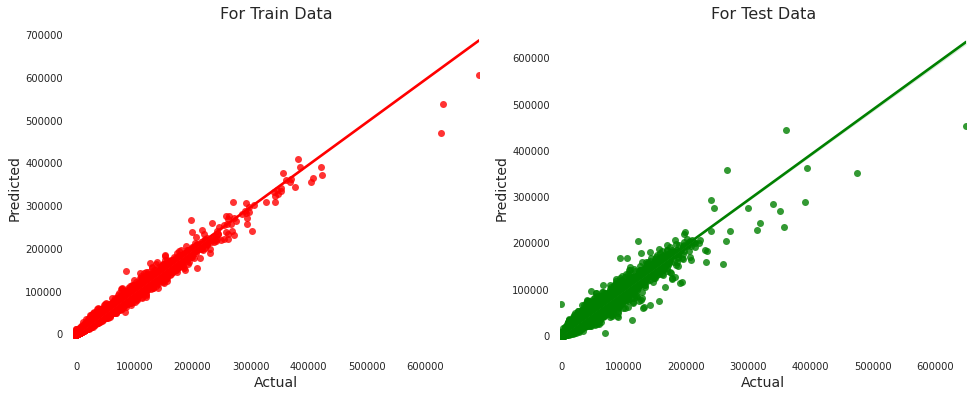

In [ ]:
# Plotting Actual vs Predicted Values
# This will take some time
plot_score(y_train, y_train_pred, y_test, y_test_pred)

**Observations:**

- The **points** are very **close** to the *regression line*.

- This implies that there is a very **little difference** between the actual and the predicted values.

- This confirms that our final model is indeed a **good model**.

<a id = Section9></a>
## **9. Conclusion**

- We studied **in-depth** about the various **features** in the data, their **characteristics** and their **distributions**.

- We went through an **extensive** and **thorough** data analysis process, exploring various **questions** regarding the **relation** between the **weekly sales** of the stores and their different **features**.

- We **encoded** the *categorical data* and **removed** any *redundant columns* to make our dataset fit for training.

- We created some **baseline models** and fitted them with the **entire dataset** and compared their performace.

- The **Baseline Random Forest** model was the **best** baseline model with **least RMSE** value.

- Then with the help of Random Forest we **compared** the **importance** of each feature in the dataset, and selected the **top 6** *most important features*.

- In this way,  the Random Forest model helped us in **Feature Selection** for our Essential Feature Models.

- We then created the **Essential Feature Models** and fitted them using only the **top 6 most important features**.
  
- The models performed much **better** after **removing** the *non-essential features*, and the **Essential Feature Random Forest** model was the **best model** overall with the **least RMSE** score of all models.

- We **tuned** the **hyperparameters** for our Random Forest model using **Grid Search** and further improved it's performance.

- We selected the **best hyperparameter combination** model found using Grid Search as our **final model**, and made **predictions** on the test set using it.

- Our final model gave a **R-Squared** value of **0.98** on the *test set*, implying that it is indeed a **very good model**, and is generalizing well on unseen data.